# **2. Persamaan Diferensial Orde Satu**

> Gabriel Jonathan (gabejonathan29@gmail.com)

## **2.2 Medan Gradien**

### **Definisi** 
untuk masalah PD orde 1 adalah pengaitan antara titik di $\mathbb{R}^2$ dengan suatu vektor (dengan arah dan panjang tertentu). 

 Pada PD orde 1, medan gradien dapat digambarkan sebagai kumpulan kurva - kurva solusi PD tersebut untuk kondisi awal yang berbeda - beda.

### **Menggambar Medan Gradien**

 Berikut adalah langkah-langkah yang diperlukan dalam menggambar suatu medan gradien dari $\dfrac{dy}{dx}=f(x,y)$:

* Lakukan diskritisasi/gridisasi bidang $\mathbb
{R}^2$ di interval tertentu, misalkan $[a, b]\times [p,q]$. Ukuran grid/banyak titik disesuaikan dengan kebutuhan.

* Hitunglah nilai gradien $\dfrac{dy}{dx}=f(x,y)$ di setiap titik grid yang sudah dibuat pada langkah 1.

* Gambarkan nilai gradien yang sudah dihitung di langkah 2, dengan :
    * saat nilai gradien negatif, gambarkan dengan garis menurun. Semakin negatif nilai gradien, garis yang digambarkan makin curam kebawah.
    * saat nilai gradien positif, gambarkan dengan garis menarik. Semakin positif nilai gradien, garis yang digambarkan makin curam keatas. 


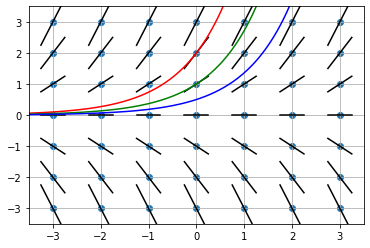

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
x = np.linspace(-3, 3, 7) # partisi [-3, 3] dengan lebar 1 -> 7 titik
y = np.linspace(-3, 3, 7)

# Mendefinisikan persamaan diferensial
def diff(x, y):
    return y

# Tahap gridisasi
xs, ys = np.meshgrid(x, y)
plt.scatter(xs, ys)         # Menampilkan titik - titik gridnya.


# Menggambar medan gradien
for j in x:
    for k in y:
        slope = diff(j, k)
        domain = np.linspace(j-0.25, j+0.25, 2) # Menggambar garis gradiennya
        def fun(x1, y1):
            z = slope*(domain - x1) + y1
            return z
        plt.plot(domain, fun(j, k), 'k', 
                 solid_capstyle = 'projecting',
                 solid_joinstyle = 'bevel')
plt.xlim([-3.5, 3.5])
plt.ylim([-3.5, 3.5])

# Plot beberapa kurva solusi untuk kondisi awal berbeda
x1 = np.linspace(-3.5, 3, 200)
plt.plot(x1, 2*np.exp(x1), c='r') 
plt.plot(x1, np.exp(x1), c='g')
plt.plot(x1, 0.5*np.exp(x1), c='b')
plt.grid('on')
plt.show()
    

## **2.3 Teorema Eksistensi dan Ketunggalan**

Pandang MNA $\frac{dy}{dt}=f(t,y) = y^{1/3}, y(0)=0$.

Kita punya $f(t,y)=y^{1/3}$ kontinu di daerah sekitar $(0,0)$, namun $f_y=\dfrac{1}{3y^{2/3}}$ tidak kontinu di $(0,0)$. 

Berdasarkan teorema, maka eksistensi solusi untuk MNA tersebut dijamin, tetapi ketunggalannya belum terjamin (belum tentu solusinya tidak tunggal). 

In [ ]:
from sympy import *
from sympy.abc import x
f = Function('f')
sol = dsolve(Derivative(f(x), x) - pow(f(x), 1/3), f(x)) # solusi umum 
print(sol)

[Eq(f(x), 2*sqrt(6)*(-C1 - x)*sqrt(C1 + x)/9), Eq(f(x), 2*sqrt(6)*(C1 + x)**(3/2)/9)]


Perhatikan bahwa solusi umum untuk PD tersebut memberikan dua buah solusi umum yang disajikan dalam suatu *list*.


Apa yang terjadi kalau kita mencoba melakukan substitusi kondisi awal secara langsung seperti pada modul?

In [ ]:
constants = solve([sol.subs(x, 0) - 0]) # substitusi kondisi awal

AttributeError: ignored

**Muncul Error Saudara-Saudari !!!**


Anda harus melakukan substitusi satu persatu ke tiap solusi pada list, seperti berikut:

In [ ]:
constant_1 = solve([sol[0].rhs.subs(x, 0) - 0]) # konstanta 1
constant_2 = solve([sol[1].rhs.subs(x, 0) - 0]) # konstanta 2
print(constant_1)
print(constant_2)

[{C1: 0}]
[{C1: 0}]


In [ ]:
final_ans_1 = sol[0].rhs.subs(constant_1[0])
final_ans_2 = sol[1].rhs.subs(constant_2[0])
print(final_ans_1)
print(final_ans_2)

-2*sqrt(6)*x**(3/2)/9
2*sqrt(6)*x**(3/2)/9
